<a href="https://colab.research.google.com/github/Avina20/Stock-Returns-Prediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [41]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv")

In [44]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [45]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


##Stock Prediction


In [46]:
series =  df['close'].values.reshape(-1,1)

In [47]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [48]:
 T = 10
 D=1
 X=[]
 Y=[]
 for t in range(len(series)-T):
   x=series[t:t+T]
   X.append(x)
   y=series[t+T]
   Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [49]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer = Adam(lr=0.1),
)

r=model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

Epoch 1/80
20/20 [==============================] - 0s 24ms/step - loss: 0.3766 - val_loss: 0.3909
Epoch 2/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0446 - val_loss: 0.2981
Epoch 3/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.1100
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.0818
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0777
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0680
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0651
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0654
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0884
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 0.0358
Epoch 11/80
20/20 

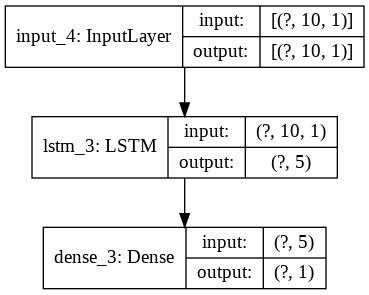

In [50]:
tf.keras.utils.plot_model(model, show_shapes=True)

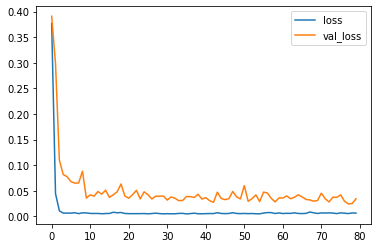

In [51]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(1249, 1)


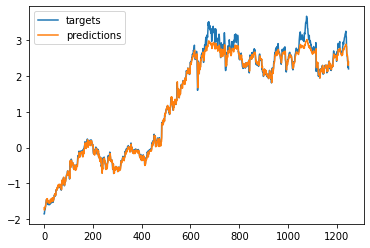

In [52]:
outputs = model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

In [53]:
#Multistep forecast
validation_target = Y[-N//2:]
validation_predictions = []

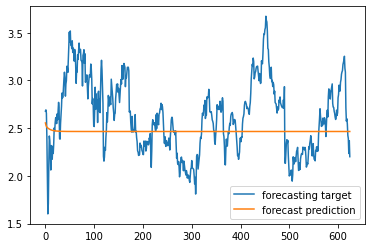

In [54]:
last_x = X[N//2]

while len(validation_predictions)<len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1]=p

plt.plot(validation_target, label='forecasting target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

##Returns Prediction

In [55]:
df['PrevClose'] = df['close'].shift(1)

In [56]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [57]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [58]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


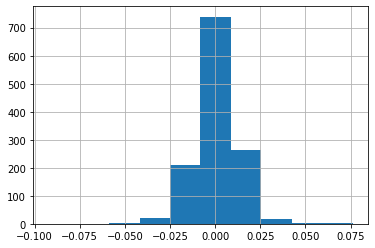

In [59]:
df['Return'].hist()

In [60]:
series = df['Return'].values[1:].reshape(-1,1)

In [61]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [62]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [63]:
i =  Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.01),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
20/20 [==============================] - 0s 23ms/step - loss: 1.0162 - val_loss: 1.1392
Epoch 2/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9939 - val_loss: 1.1421
Epoch 3/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9833 - val_loss: 1.1575
Epoch 4/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9875 - val_loss: 1.1617
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9879 - val_loss: 1.1443
Epoch 6/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9824 - val_loss: 1.1655
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9813 - val_loss: 1.1584
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9810 - val_loss: 1.1505
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9810 - val_loss: 1.1588
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9797 - val_loss: 1.1614
Epoch 11/80
20/20 

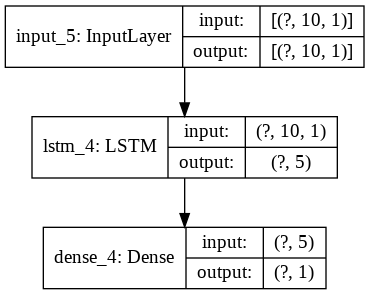

In [64]:
tf.keras.utils.plot_model(model, show_shapes=True)

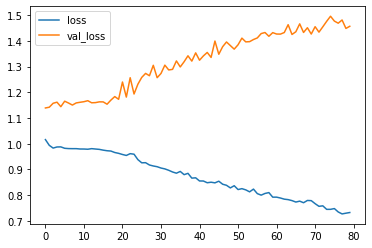

In [65]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1248, 1)


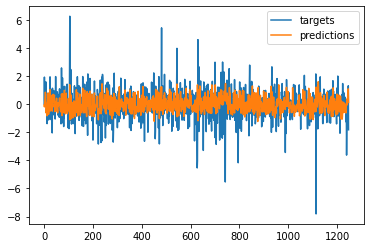

In [66]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

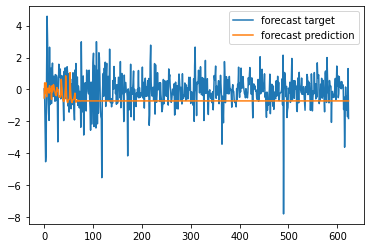

In [67]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

##Directional Classification

In [68]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [69]:
T = 10
D = input_data.shape[1]
N = len(input_data)-T

In [70]:
Ntrain =  len(input_data) * 2 //3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [71]:
X_train = np.zeros((Ntrain,T,D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t,:,:] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [72]:
X_test = np.zeros((N-Ntrain, T, D))
Y_test = np.zeros(N-Ntrain)

for u in range(N - Ntrain):
  t=u+Ntrain
  X_test[u,:,:] = input_data[t:t+T]
  Y_test[u] = (targets[t+T]>0)

In [73]:
i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'],
)

In [74]:
r = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs = 300,
    validation_data = (X_test, Y_test),
)

Epoch 1/300
27/27 [==============================] - 1s 20ms/step - loss: 0.6981 - accuracy: 0.4791 - val_loss: 0.6988 - val_accuracy: 0.4854
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5280 - val_loss: 0.6943 - val_accuracy: 0.4854
Epoch 3/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.4934 - val_loss: 0.6934 - val_accuracy: 0.5073
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5161 - val_loss: 0.6949 - val_accuracy: 0.4878
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5316 - val_loss: 0.6910 - val_accuracy: 0.5366
Epoch 6/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5316 - val_loss: 0.6939 - val_accuracy: 0.5024
Epoch 7/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5375 - val_loss: 0.6944 - val_accuracy: 0.4951
Epoch 8/300


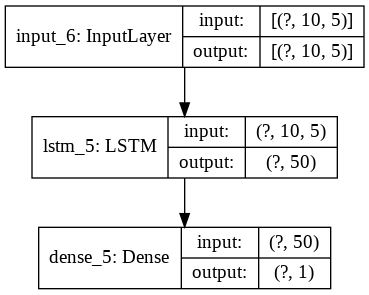

In [75]:
tf.keras.utils.plot_model(model, show_shapes=True)

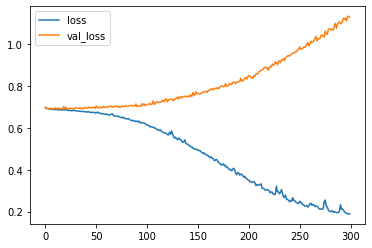

In [76]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

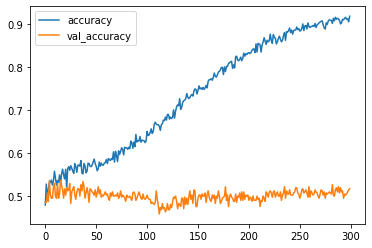

In [77]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()